In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [70]:

# Load the dataset
df = pd.read_csv('loaddata.csv')


In [71]:

# Question 1: Data Observation and Understanding

# a) What are the available data types in this dataset?
print("Data Types:")
print(df.dtypes)


Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [72]:

# b) What is the statistical summary of all the attributes?
print("\nStatistical Summary:")
print(df.describe(include='all'))



Statistical Summary:
         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000       

In [73]:

# c) How to handle the missing values and inconsistencies in the data?
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)




Missing Values Before Handling:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [74]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [75]:
# d) Do we need to convert the categorical values into numerical values?
print("\nData Before Encoding Categorical Values:")
print(df.head())


Data Before Encoding Categorical Values:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0       

In [76]:
# Convert categorical values to numerical values
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [77]:
print("\nData After Encoding Categorical Values:")
print(df.head())


Data After Encoding Categorical Values:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          1              0   
1  LP001003       1        1           1          1              0   
2  LP001005       1        1           0          1              1   
3  LP001006       1        1           0          0              0   
4  LP001008       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1

In [78]:
# e) What are the independent and dependent variables?
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
print("\nIndependent variables:", X.columns.tolist())
print("Dependent variable:", 'Loan_Status')




Independent variables: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Dependent variable: Loan_Status


In [79]:
# Question 2: Correlation Coefficient
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914  -0.045364      -0.000525   
Married            0.364569  1.000000    0.334216  -0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000  -0.055752       0.056798   
Education         -0.045364 -0.012304   -0.055752   1.000000       0.010383   
Self_Employed     -0.000525  0.004489    0.056798   0.010383       1.000000   
ApplicantIncome    0.058809  0.051708    0.118202   0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430   0.062290      -0.016100   
LoanAmount         0.106904  0.146546    0.163103   0.168759       0.115100   
Loan_Amount_Term  -0.074030 -0.100912   -0.103864   0.073928      -0.033739   
Credit_History     0.009170  0.010938   -0.040160   0.073658      -0.001550   
Property_Area     -0.025752  0.004257   -0.000244   0.065243      -0.030860   

                   ApplicantIn

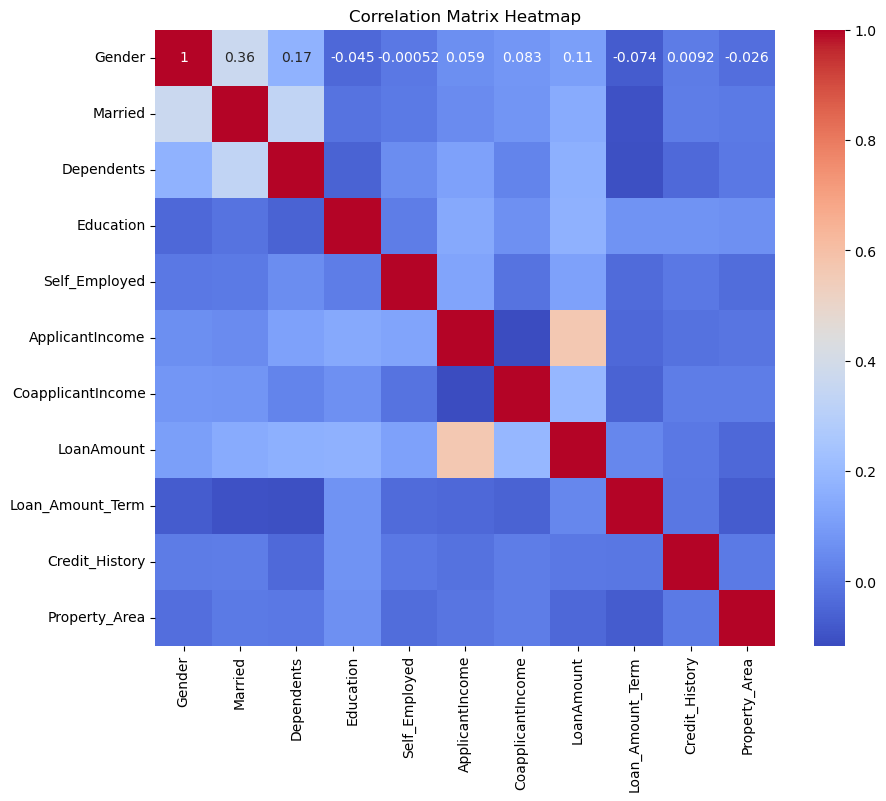

In [80]:
# Question 3: Heatmap Visualization and Data Visualization
# a) Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

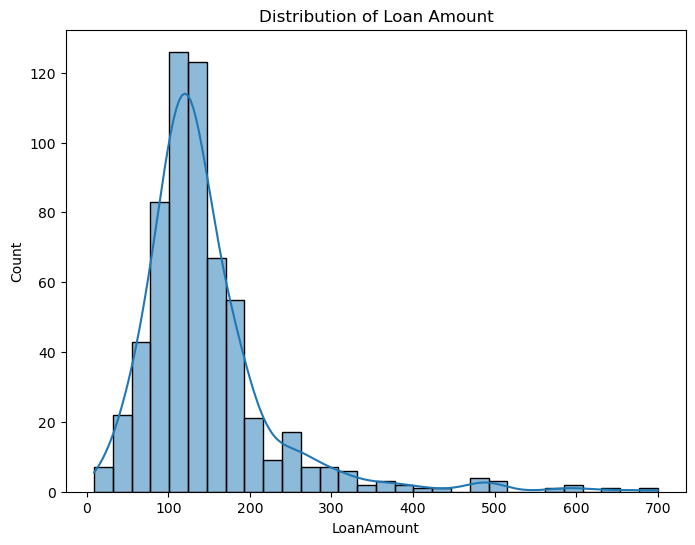

In [81]:
# b) Other visualizations
# Distribution of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

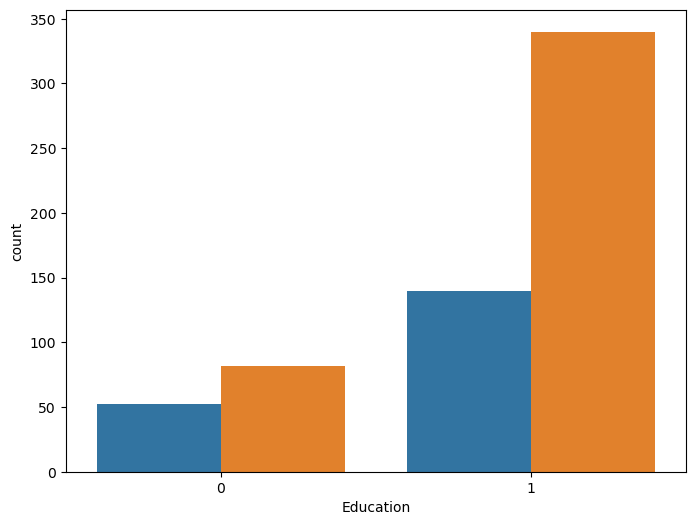

In [82]:
# Loan Status by Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()



AttributeError: 'numpy.int64' object has no attribute 'startswith'

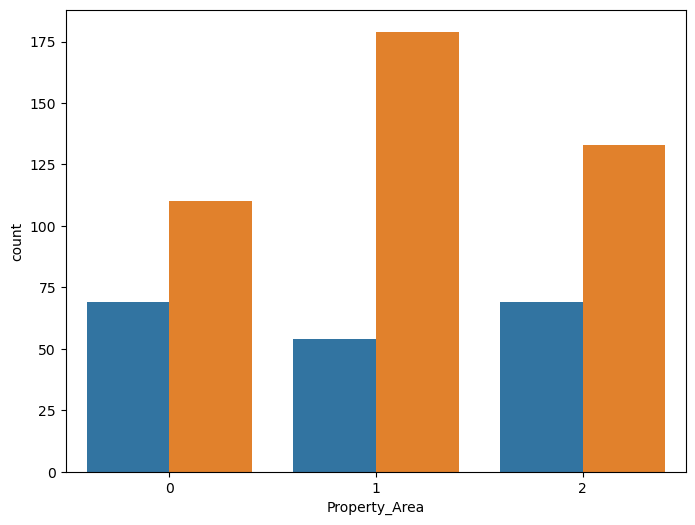

In [83]:
# Loan Status by Property Area
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()


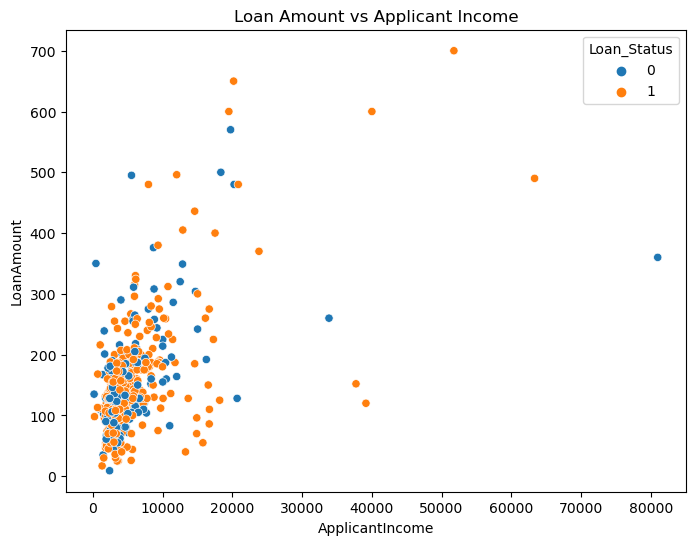

In [84]:
# Scatter plot for Loan Amount vs Applicant Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount vs Applicant Income')
plt.show()

<Figure size 800x600 with 0 Axes>

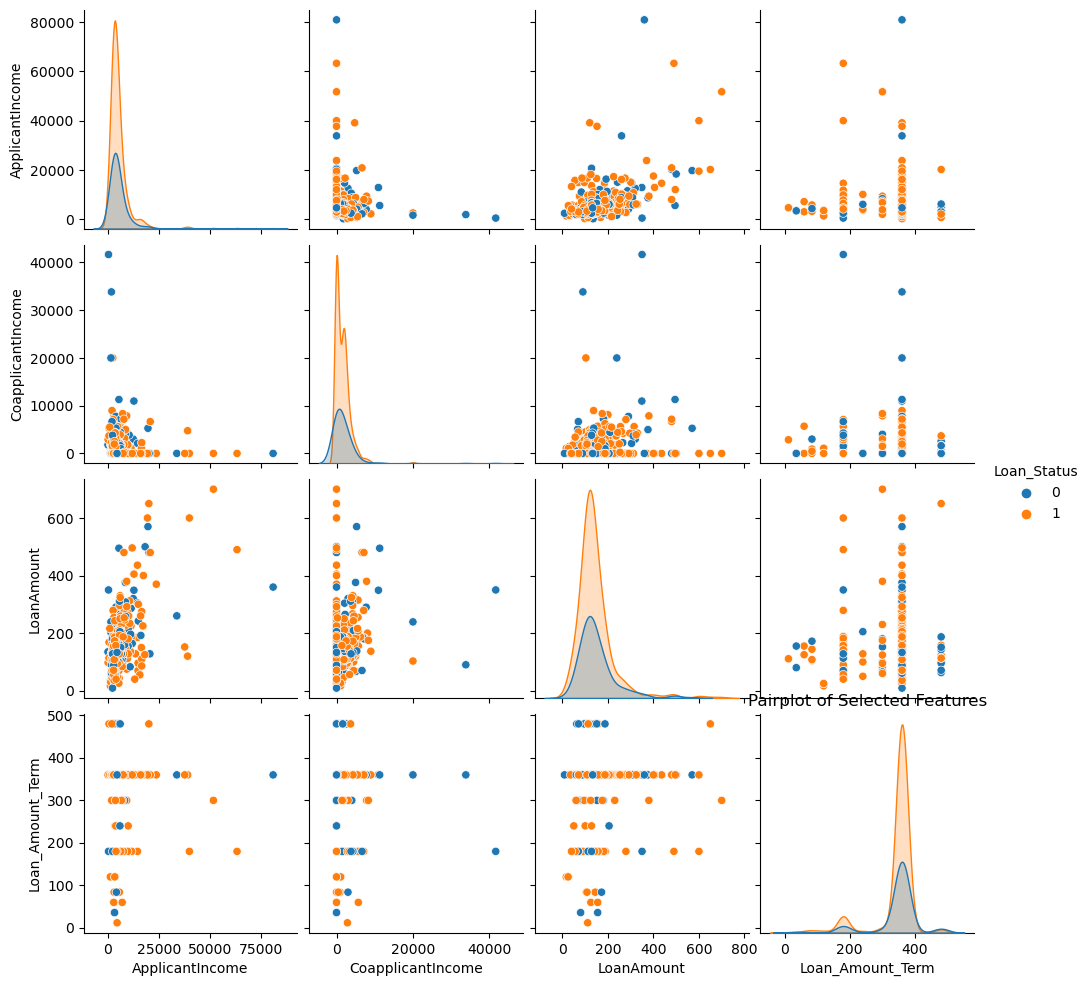

In [85]:
# Pairplot for selected features
plt.figure(figsize=(8, 6))
sns.pairplot(df, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], hue='Loan_Status')
plt.title('Pairplot of Selected Features')
plt.show()

In [86]:
# Question 4: Building and Comparing Predictive Models
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression Accuracy: {:.2f}%".format(logreg_accuracy * 100))


Logistic Regression Accuracy: 78.38%


In [88]:
# Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rfc_accuracy * 100))

Random Forest Classifier Accuracy: 75.68%


In [89]:
# Compare Performance
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rfc))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.43      0.55        65
           1       0.75      0.93      0.83       120

    accuracy                           0.76       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.76      0.76      0.73       185



In [90]:
# Question 5: Using Different Independent Variables
# Using a subset of independent variables
X_new = df[['Credit_History', 'Education', 'LoanAmount']]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [91]:
# Logistic Regression Model with new features
logreg_new = LogisticRegression(max_iter=1000)
logreg_new.fit(X_train_new, y_train_new)
y_pred_logreg_new = logreg_new.predict(X_test_new)
logreg_new_accuracy = accuracy_score(y_test_new, y_pred_logreg_new)
print("\nLogistic Regression with new features Accuracy: {:.2f}%".format(logreg_new_accuracy * 100))


Logistic Regression with new features Accuracy: 78.38%


In [92]:
# Random Forest Classifier Model with new features
rfc_new = RandomForestClassifier(n_estimators=100)
rfc_new.fit(X_train_new, y_train_new)
y_pred_rfc_new = rfc_new.predict(X_test_new)
rfc_new_accuracy = accuracy_score(y_test_new, y_pred_rfc_new)
print("Random Forest Classifier with new features Accuracy: {:.2f}%".format(rfc_new_accuracy * 100))

Random Forest Classifier with new features Accuracy: 72.43%


In [93]:
# Compare Performance with new features
print("\nLogistic Regression with new features Classification Report:\n", classification_report(y_test_new, y_pred_logreg_new))
print("Random Forest Classifier with new features Classification Report:\n", classification_report(y_test_new, y_pred_rfc_new))


Logistic Regression with new features Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

Random Forest Classifier with new features Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.49      0.56        65
           1       0.76      0.85      0.80       120

    accuracy                           0.72       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.71      0.72      0.71       185

